In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
def mandelbrot_point(c, n_iterations, threshold=2):
    z = 0
    for n in range(n_iterations):
        z = z**2 + c

        # threshold - usually 2
        if abs(z) > threshold:
            break
    return n

def mandelbrot(x_start, x_end, y_start, y_end, x_resolution, n_iterations, threshold):
    y_resolution = int(x_resolution*(y_end-y_start)/(x_end-x_start))
    points_to_draw = np.zeros((y_resolution, x_resolution))

    for x in range(x_resolution):
        for y in range(y_resolution):
            c = (x_end - x_start) * x/x_resolution + x_start + ((y_end - y_start) * -y/y_resolution + y_end)*1j
            # save threshold point as pixel value
            points_to_draw[y][x] = mandelbrot_point(c, n_iterations, threshold)

    plt.imshow(points_to_draw, cmap='hot', extent=(x_start, x_end, y_start, y_end))
    plt.show()

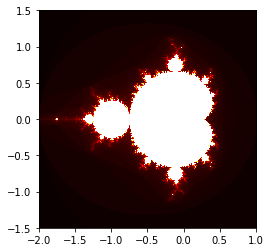

In [39]:
mandelbrot(x_start = -2, 
           x_end = 1, 
           y_start = -1.5001, 
           y_end = 1.5, 
           x_resolution = 500, 
           n_iterations = 100,
           threshold = 2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


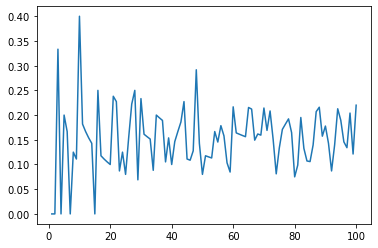

In [15]:
from numpy import random

def montecarlo(s, i, plot = False):
    # s = 100000
    # i = 100
    in_area = 0
    x_in_area = []
    y_in_area = []

    x_start = -2
    x_end = 1
    y_start = -1.5001
    y_end = 1.5

    for _ in range(s):
        random_x = random.uniform(x_start, x_end)
        random_y = random.uniform(y_start, y_end)
        c = random_x + random_y*1j

        if mandelbrot_point(c, i) == i - 1:
            x_in_area.append(random_x)
            y_in_area.append(random_y)
            in_area += 1

    # print(f"Area = {in_area/float(s)}")
    if plot:
        plt.scatter(x_in_area, y_in_area)
        plt.show
    return in_area/float(s)

l_areas = []
for i in np.arange(1, 101): 
    print(i)
    area = montecarlo(i, 100000)
    l_areas.append(area)

plt.plot(np.arange(1, 101), l_areas)
plt.show()



